# Python Assignment 3

⏱⏱⏱**Due: 11/02/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace. **Please include all outputs in your notebook, including plots, printouts, etc..**

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

##**For Questions 2a and 2b, you can choose one of them to complete, if you completed both, only Questions 2a will be graded.**

**This assignment is out of 150 points; surplus points can be applied to other assignments (including Matlab and C/C++). However, it cannot be applied to your final project grade, and your assignment grade will not excced 75% of your total grade.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, **include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.** Do not submit a compressed file (.rar, .zip, etc..), submit files separately.

If you are tasked with implementing a numerical algorithm, it is expected that you would not rely on pre-existing methods. For example, if you were asked to solve $Ax=b$, you should write your own program to solve, not just by calling numpy.linalg.solve.



## 2a. Numerical Integration (30 pts)

For a domain discretized into $N$ equally spaced panels:
$$
\Delta x=\frac{b-a}{N}.
$$
The approximation to the integral is
$$\begin{aligned}
\int_a^b f(x) d x & \approx \frac{\Delta x}{2} \sum_{k=1}^N\left(f\left(x_{k-1}\right)+f\left(x_k\right)\right) \\
& =\frac{\Delta x}{2}\left(f\left(x_0\right)+2 f\left(x_1\right)+2 f\left(x_2\right)+2 f\left(x_3\right)+\cdots+2 f\left(x_{N-1}\right)+f\left(x_N\right)\right) \\
& =\Delta x\left(\sum_{k=1}^{N-1} f\left(x_k\right)+\frac{f\left(x_N\right)+f\left(x_0\right)}{2}\right) .
\end{aligned}$$
This is the trapezoid rule scheme.


Given the function $f(x) = 3x^2 + 2x +2$, your tasks are:

1. Carry out the integration symbolically using the SymPy library. Output the result (i.e. print out the result).
2. Implement the trapezoid rule to estimate the integral $\int_{-4}^6 f(x) dx$ using the following values of $N = 10, 20, 40, 80, 160, 320, 640, 1280$. Output the results (i.e. print out the results).
3. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against N.





Task 1: Symbolic integration result = 320
Task 2: Trapezoid rule implementation
N = 10, Approximation = 325.000000000000
N = 20, Approximation = 321.250000000000
N = 40, Approximation = 320.312500000000
N = 80, Approximation = 320.078125000000
N = 160, Approximation = 320.019531250000
N = 320, Approximation = 320.004882812500
N = 640, Approximation = 320.001220703125
N = 1280, Approximation = 320.000305175781
Task 3: Plot absolute error against N


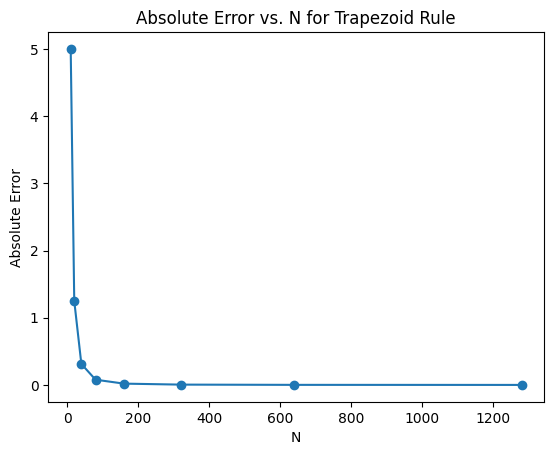

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt

# Define the symbolic variable and function
x = sp.symbols('x')
f = 3*x**2 + 2*x + 2

# Task 1: Symbolic integration
integral_sympy = sp.integrate(f, (x, -4, 6))
print("Task 1: Symbolic integration result =", integral_sympy)


# Task 2: Trapezoid rule implementation
print("Task 2: Trapezoid rule implementation")
def trapezoid_rule(a, b, N):
    # Calculate the width of each panel
    delta_x = (b - a) / N

    # Generate the x values for the panels
    x_vals = []
    for k in range(N+1):
      x_vals.append(a + k*delta_x)

    # Calculate the approximate integral using trapezoid rule
    integral_approx = delta_x * (
        sum(f.subs(x, x_vals[k]) for k in range(1, N)) +
        (f.subs(x, x_vals[0]) + f.subs(x, x_vals[N])) / 2
    )

    return integral_approx

# List of N values to test
N_values = [10, 20, 40, 80, 160, 320, 640, 1280]

# Calculate approximations for different N values
integral_trapezoid = []
for N in N_values:
    integral = trapezoid_rule(-4, 6, N)
    integral_trapezoid.append(integral)
    print(f"N = {N}, Approximation = {integral}")

# Task 3: Plot absolute error against N
print("Task 3: Plot absolute error against N")
absolute_errors = [abs(integral_sympy - integral) for integral in integral_trapezoid]
plt.plot(N_values, absolute_errors, marker='o')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title('Absolute Error vs. N for Trapezoid Rule')
plt.show()


## 2b. Numerical Differentiation (30 pts)

Your tasks:
1. Find the closed form expression of $f_{xy}(x,y)$, i.e. $\frac{d^2}{dxdy}f(x,y)$, for $f(x,y) = \left(sin^2\left(x\right)e^xcos(y)\right)$ using `sympy`. Output the result.
2. Find $f_{xy}(2,3)$ with `sympy` and take 15 significant digits, use it as the "groud truth solution". Output the result.
3. Approximate $f_{xy}(2,3)$ using central difference approximation for the following values of $h = 0.1, 0.01, 0.001, 0.0001$. Output the results.
4. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against the step size $h$. `plt.gca().invert_xaxis() ` might help.

Recall from the lecture:
$$f_{x y}(x, y) \approx \frac{f(x+h, y+k)-f(x+h, y-k)-f(x-h, y+k)+f(x-h, y-k)}{4 h k}.$$
For simplicity, we set $k = h$.

Task 1: f_xy(x, y) = -(sin(x) + 2*cos(x))*exp(x)*sin(x)*sin(y)
Task 2: f_xy(2, 3) (Ground Truth) = -0.0730121966594062
Task 3: Approximate f_xy(2, 3) using central difference approximation
Approximation for h = 0.1: -0.0688582152443606
Approximation for h = 0.01: -0.0729703465585096
Approximation for h = 0.001: -0.0730117781788664
Approximation for h = 0.0001: -0.0730121962888575


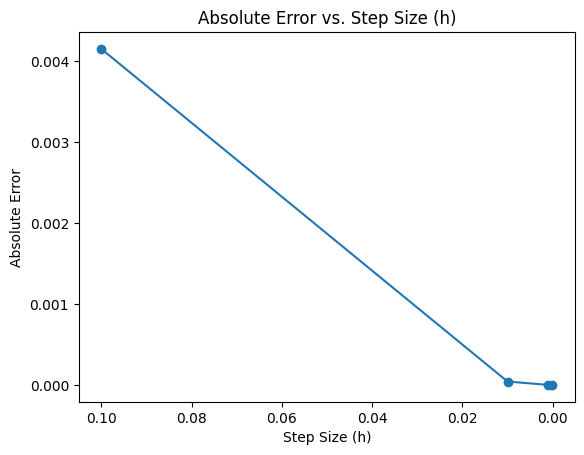

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt

# Define the symbols and function
x, y, h = sp.symbols('x y h')
f = (sp.sin(x)**2 * sp.exp(x) * sp.cos(y))

# Task 1: Find the closed form expression of f_xy(x, y)
f_xy = sp.diff(f, x, y)
print("Task 1: f_xy(x, y) =", f_xy)

# Task 2: Find f_xy(2, 3) with 15 significant digits
f_xy_ground_truth = f_xy.subs({x: 2, y: 3}).evalf(n=15)
print("Task 2: f_xy(2, 3) (Ground Truth) =", f_xy_ground_truth)

# Task 3: Approximate f_xy(2, 3) using central difference approximation
print("Task 3: Approximate f_xy(2, 3) using central difference approximation")
h_values = [0.1, 0.01, 0.001, 0.0001]
f_xy_approximations = []

for h_value in h_values:
    # Central difference approximation formula
    f_xy_approx = (f.subs({x: 2+h_value, y: 3+h_value}) - f.subs({x: 2+h_value, y: 3-h_value}) -
                   f.subs({x: 2-h_value, y: 3+h_value}) + f.subs({x: 2-h_value, y: 3-h_value})) / (4 * h_value**2)
    f_xy_approximations.append(f_xy_approx)

    print(f"Approximation for h = {h_value}: {f_xy_approx}")

# Task 4: Plot absolute error against step size h
print("Task 4: Plot absolute error against step size h")
absolute_errors = [abs(f_xy_ground_truth - approx) for approx in f_xy_approximations]

plt.plot(h_values, absolute_errors, marker='o')
plt.xlabel('Step Size (h)')
plt.ylabel('Absolute Error')
plt.title('Absolute Error vs. Step Size (h)')
plt.gca().invert_xaxis()
plt.show()


## 3. Pandas I (15 pts)

1. Create a 3x4 (3 rows by 4 columns) pandas DataFrame with the columns named after the following Long Island towns: Hempstead, Babylon, Islip, and Brookhaven. The rows represent 'Population in 2099', 'Population in 2300', 'Population in 2400'. Fill each of the 12 cells in the DataFrame with a random integer from 1000 to 10000, inclusive. `np.random.randint()` might be helpful.
For Example:

```
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2931     8043   8414        8661
Population in 2300       5444     9227   7393        8007
Population in 2400       1660     7977   4730        2940
```



2. Output the following:
  - The entire DataFrame.
  - The value in the cell of row #1 (indexing starts with 0) under the Hempstead column.

3. Add a new column named Riverhead. Populate this column with the sum of the respective row values from the Islip and Brookhaven columns. Output the entire DataFrame again.

In [ ]:
import pandas as pd
import numpy as np

# Task 1: Create a 3x4 DataFrame with random population values
towns = ['Hempstead', 'Babylon', 'Islip', 'Brookhaven']
years = ['Population in 2099', 'Population in 2300', 'Population in 2400']

# Generate random population data
population_data = np.random.randint(1000, 10001, (3, 4))

# Create the DataFrame
df = pd.DataFrame(population_data, index=years, columns=towns)
print("Task 1")
print(df)

# Task 2: Output the entire DataFrame and a specific cell value
print("Task 2:")
print(df)
print("\nValue at row #1 under Hempstead column:", df['Hempstead'][1])

# Task 3: Add a new column 'Riverhead' and calculate its values
df['Riverhead'] = df['Islip'] + df['Brookhaven']

# Output the DataFrame after adding the new column
print("\nTask 3:")
print(df)


Task 1
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       4143     6275   1978        4208
Population in 2300       1062     3170   6157        4126
Population in 2400       8637     3082   1813        5632
Task 2:
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       4143     6275   1978        4208
Population in 2300       1062     3170   6157        4126
Population in 2400       8637     3082   1813        5632

Value at row #1 under Hempstead column: 1062

Task 3:
                    Hempstead  Babylon  Islip  Brookhaven  Riverhead
Population in 2099       4143     6275   1978        4208       6186
Population in 2300       1062     3170   6157        4126      10283
Population in 2400       8637     3082   1813        5632       7445


## 4. Pandas II (15 pts)

0. Download the cvs file that comes with this assignment, and read it into a dataframe. You can also download this [csv file](https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv) with this link.
1. Arrange the data in alphabetical order based on the last name. Display the first few rows.
2. Count the number of customers whose subscription date is in 2021 (2021-01-01 to 2021-12-31). Report this number (e.g. print).

In [ ]:
import pandas as pd

# Task 0: Download and read the CSV file
import requests
import pandas as pd

# URL of the CSV file
url = "https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv"

# Download the file
response = requests.get(url)
with open('customers-100.csv', 'wb') as file:
    file.write(response.content)

# Read the CSV file into a DataFrame
df = pd.read_csv('customers-100.csv')

# Task 1: Arrange data by last name and display the first few rows
df_sorted = df.sort_values(by='Last Name')
print("Task 1: Data sorted by last name, displaying the first few rows:")
print(df_sorted.head())

# Task 2: Count customers with subscription date in 2021
start_date = '2021-01-01'
end_date = '2021-12-31'
num_customers_2021 = df[(df['Subscription Date'] >= start_date) & (df['Subscription Date'] <= end_date)].shape[0]
print(f"\nTask 2: Number of customers with subscription date in 2021: {num_customers_2021}")


Task 1: Data sorted by last name, displaying the first few rows:
    Index      Customer Id First Name Last Name                Company  \
67     68  a014Ec1b9FccC1E        Tom  Alvarado    Donaldson-Dougherty   
96     97  CeD220bdAaCfaDf       Lynn  Atkinson  Ware, Burns and Oneal   
92     93  aAb6AFc7AfD0fF3     Collin     Ayers          Lamb-Peterson   
0       1  DD37Cf93aecA6Dc     Sheryl    Baxter        Rasmussen Group   
15     16  8cad0b4CBceaeec    Miranda   Beasley     Singleton and Sons   

                City    Country             Phone 1                Phone 2  \
67  South Sophiaberg   Kiribati  (585)606-2980x2258      730-797-3594x5614   
96      New Bradview  Sri Lanka     +1-846-706-2218           605.413.3198   
92      South Lonnie   Anguilla    404-645-5351x012  001-257-582-8850x8516   
0       East Leonard      Chile        229.077.5154       397.884.0519x718   
15      Desireeshire       Oman    540.085.3135x185  +1-600-462-6432x21881   

                     

## 5. LU decomposition (50 + 30 pts)


Part A (50 points)
1. Write a function `LUdecomposition()` that takes as input a matrix $A\in \mathbb{R}^{n \times n}$. Perform Gaussian Elimination to have this function return two matrices $L$ and $U$ such that $A=LU$.
2. Your function should raise any relevant errors, for example, raise an error if a pure LU decomposition does not exist for $A$ (meaning that you have to perform pivoting, i.e., permutation of rows).
3. Create several random matrices for the purpose of testing your function. Obtain the $L$ and $U$ matrices, and for each random matrix obtain its L and U matrices and perform a matrix multiplication (`np.matmul()`) to determine whether the outcome closely resembles the original matrix $A$, allowing for slight differences attributable to precision errors.


Note: LU decomposition with Gaussian elimination should be covered in your undergraduate linear algebra class. It is also covered in AMS 510. If you do not know how, this 10 minute [video](https://www.youtube.com/watch?v=UlWcofkUDDU&ab_channel=Mathispower4u) explains it very well.

Part B (30 bonus points)
4. Not all square matrices have a pure LU decomposition. However, PLU decomposition always exists. Write another function `pivoting()` that takes as input a matrix $A$ and return the permutation/pivoting matrix $P$ such that $PA$ always has a pure LU decomposition.
5. Find an example $A$ for which `LUdecomposition()` raises an error. Then, use `pivoting()` to find $P$, and find the pure LU decomposition of $PA$. Verify that indeed $PA = LU$ with matrix multiplication (`np.matmul()`).


Hint: Please do not print out a giant matrix and visually examine the outcomes. Think of a way to verify your results and output a boolean value.


In [53]:
import numpy as np

# Function to perform LU decomposition
def LUdecomposition(A):
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n, dtype=np.double)

    # Loop through each row
    for i in range(n):
        # Check for zero pivot
        if np.isclose(U[i, i], 0.0):
          # Find a non-zero pivot below
          for k in range(i+1, n):
                if not np.isclose(U[k, i], 0.0):
                  raise ValueError("Zero pivot encountered with another non-Zero pivot. LU decomposition does not exist.")
        else:
          # Calculate factors for elimination
          factor = U[i+1:, i] / U[i, i]

          # Update lower and upper matrices
          L[i+1:, i] = factor
          U[i+1:] -= factor[:, np.newaxis] * U[i]

    return L, U


# Function to test LU decomposition
def test_LUdecomposition():
    print("Part A Testing")
    for _ in range(5):
        # Generate random matrix
        A = np.random.rand(3, 3)
        L, U = LUdecomposition(A)

        # Check if LU decomposition is accurate
        result = np.allclose(A, np.matmul(L, U))
        print(f"Test passed: {result}")

# Part A: Test LU decomposition
test_LUdecomposition()


############################################################################

# Part B: Function for pivoting (permutation matrix)
def pivoting(A):
    n = A.shape[0]
    P = np.eye(n, dtype=np.double)

    U = A.copy()
    L = np.eye(n, dtype=np.double)

    # Loop through rows for pivoting
    for i in range(n):
        for k in range(i, n-1):
            if not np.isclose(U[i, i], 0.0):
                break
            U[[k, k+1]] = U[[k+1, k]]
            P[[k, k+1]] = P[[k+1, k]]

        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        U[i+1:] -= factor[:, np.newaxis] * U[i]

    return P


########################################################################
print("Example 1")
# Define matrix A
A = np.array([[0, 1], [1, 0]], dtype=np.double)
print("\n Part B testing")
print("A:")
print(A)

# Perform LU decomposition
try:
    L, U = LUdecomposition(A)
    print("LU decomposition successful:")
    print("L:")
    print(L)
    print("U:")
    print(U)
except ValueError as e:
    print(e)

# Find permutation matrix P
P = pivoting(A)
print("P:")
print(P)

# Calculate PA
PA = np.matmul(P, A)
print("PA:")
print(PA)

# Perform LU decomposition on PA
L, U = LUdecomposition(PA)
print("L:")
print(L)
print("U:")
print(U)

# Check if PA = LU
result = np.allclose(PA, np.matmul(L, U))
print(f"PA = LU: {result}")





#################################################################
"""
#Example 2 NOT PA = LU
# Define a matrix A with a zero pivot
A2 = np.array([[1, 2, 3], [2, 4, 6], [3, 6, 9]], dtype=np.double)

# Try to perform LU decomposition on A

L, U = LUdecomposition(A2)
#print("LU decomposition successful:")
#print("L:")
#print(L)
#print("U:")
#print(U)
result = np.allclose(A2, np.matmul(L, U))
print("Example 2 NOT PA = LU with Zero Pivot")
print(f"A = LU: {result}")
"""


##############################################################
#Example 3 PA = LU
print("Example 3")
A3 = np.array([[1,1, 1], [0, 0, 1], [2, 3, 4]], dtype=np.double)

# Perform LU decomposition
try:
    L3, U3 = LUdecomposition(A3)
    print("LU decomposition successful:")
    print("L:")
    print(L)
    print("U:")
    print(U)
except ValueError as e:
    print(e)
# Find permutation matrix P
P3 = pivoting(A3)

# Calculate PA
PA3 = np.matmul(P3, A3)


# Perform LU decomposition on PA
L3, U3 = LUdecomposition(PA3)

# Check if PA = LU
result = np.allclose(PA3, np.matmul(L3, U3))
print(f"PA = LU: {result}")






Part A Testing
Test passed: True
Test passed: True
Test passed: True
Test passed: True
Test passed: True
Example 1

 Part B testing
A:
[[0. 1.]
 [1. 0.]]
Zero pivot encountered with another non-Zero pivot. LU decomposition does not exist.
P:
[[0. 1.]
 [1. 0.]]
PA:
[[1. 0.]
 [0. 1.]]
L:
[[1. 0.]
 [0. 1.]]
U:
[[1. 0.]
 [0. 1.]]
PA = LU: True
Example 3
Zero pivot encountered with another non-Zero pivot. LU decomposition does not exist.
PA = LU: True


Fact: LU and PLU decompositions are not unique.

## 6. Markov Chain (30 pts)

**BACKGROUND:** Consider a Markov chain transition matrix $P$ on a set of $n$ states, where $P_{i j}$ corresponds to the probability $\left(0 \leq P_{i j} \leq 1\right)$ to go from state $i$ to the state $j$, and each row is normalized so that
$$
\sum_{j=1}^n P_{i j}=1 .
$$

Let $p$ be a size- $n$ vector composed of the probability distribution over the $n$ states, where
$$
\sum_{j=1}^n p_j=1 .
$$

The transition rule corresponding to the transition matrix $P$ is $\hat{p}=P^T p$, where $\hat{p}$ corresponds to a new probability distribution and
$$
\sum_{j=1}^n \hat{p}_j=1 .
$$
TASK: Write a program that works with 5 states `only use the numpy library`. In particular,
0. Fix the random seed to be the last digit of your id: `numpy.random.seed()`.

1. Construct a random $5 \times 5$ matrix $P$, and normalize each row so that
$$
\sum_{j=1}^5 P_{i j}=1 .
$$

2. Construct a random size-5 vector $p$ and normalize it so that
$$
\sum_{j=1}^5 p_j=1 .
$$
Apply the transition rule 50 times to obtain $p_{50}$.
3. Compute the eigenvector $v$ of $P^T$ corresponding to the eigenvalue 1 (and numerically, the eigenvalue closest to $1)$, and then scale the eigenvector so that
$$
\sum_{j=1}^5 v_j=1 .
$$
This scaled eigenvector is known as the stationary distribution.

4. Compute the component wise difference between $p_{50}$ and the stationary distribution. Do they match with each other within $1 \mathrm{e}-5$ ?

HINTS: You may find the following functions useful in your implementation:
- np.random.rand
- np.dot
- np.linalg.eig

In [39]:
import numpy as np

# Task 0: Fix the random seed
np.random.seed(3)  # Change the seed to the last digit of your ID

# Task 1: Construct a random 5x5 matrix P and normalize each row
P = np.random.rand(5, 5)
P = P / P.sum(axis=1, keepdims=True)

# Task 2: Construct a random size-5 vector p and normalize it
p = np.random.rand(5)
p = p / p.sum()

# Apply the transition rule 50 times
for _ in range(50):
    p = np.dot(P.T, p)
    p = p / p.sum()

# Task 3: Compute the eigenvector v of P^T corresponding to eigenvalue 1
eigenvalues, eigenvectors = np.linalg.eig(P.T)
index = np.argmin(np.abs(eigenvalues - 1))
v = eigenvectors[:, index].real
v = v / v.sum()

# Task 4: Compute the component-wise difference between p50 and the stationary distribution
difference = np.abs(p - v)

# Check if the components match within 1e-5
match = np.all(difference < 1e-5)

print("Matrix P:")
print(P)
print("\nRandom vector p:")
print(p)
print("\nTransitioned p after 50 iterations:")
print(p)
print("\nEigenvector v of P^T:")
print(v)
print("\nComponent-wise difference between p50 and stationary distribution:")
print(difference)
print("\nDo the components match within 1e-5?")
print(match)


Matrix P:
[[0.186482   0.23975549 0.09849075 0.17294938 0.30232238]
 [0.52067733 0.0729554  0.12039217 0.02989849 0.25607661]
 [0.01429076 0.21851821 0.31050674 0.13320954 0.32347475]
 [0.31972189 0.01297684 0.30240164 0.14028414 0.22461549]
 [0.13382451 0.32716273 0.20789519 0.07404194 0.25707562]]

Random vector p:
[0.21972728 0.20212093 0.1962758  0.10545074 0.27642524]

Transitioned p after 50 iterations:
[0.21972728 0.20212093 0.1962758  0.10545074 0.27642524]

Eigenvector v of P^T:
[0.21972728 0.20212093 0.1962758  0.10545074 0.27642524]

Component-wise difference between p50 and stationary distribution:
[3.05311332e-16 5.55111512e-17 1.11022302e-16 1.38777878e-17
 5.55111512e-17]

Do the components match within 1e-5?
True
